# Sentiment Classification and Opinion Mining on Airline Reviews

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Tweets.csv')     #read the dataset
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
data.isnull().sum()    #check for null values

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
data =data.drop(columns=['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_created','tweet_location','user_timezone'], axis=1)
data   #drop unwanted columns

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...
14636,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...
14638,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ..."


In [5]:
x= data.iloc[:,1:].values   #split the datset 
x                           

array([[1.0, nan, nan, ..., 'cairdin', 0,
        '@VirginAmerica What @dhepburn said.'],
       [0.3486, nan, 0.0, ..., 'jnardino', 0,
        "@VirginAmerica plus you've added commercials to the experience... tacky."],
       [0.6837, nan, nan, ..., 'yvonnalynn', 0,
        "@VirginAmerica I didn't today... Must mean I need to take another trip!"],
       ...,
       [1.0, nan, nan, ..., 'sanyabun', 0,
        '@AmericanAir Please bring American Airlines to #BlackBerry10'],
       [1.0, 'Customer Service Issue', 0.6659, ..., 'SraJackson', 0,
        "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
       [0.6771, nan, 0.0, ..., 'daviddtwu', 0,
        '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']],
      dtype=object)

In [6]:
y=data.iloc[:,0].values
y

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [7]:
x.shape

(14640, 7)

In [8]:
y.shape

(14640,)

## Data Visualization

### Scatter plot

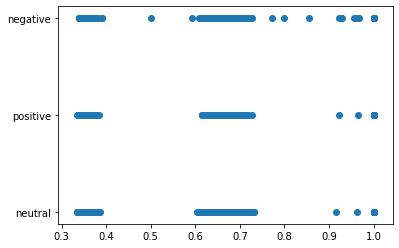

In [9]:
plt.scatter(x[:,0],y)

### Count plot

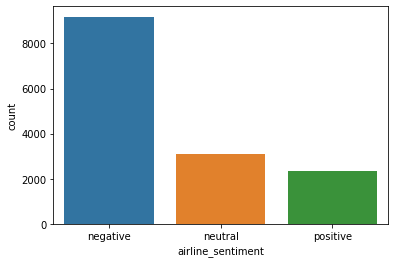

In [10]:
sns.countplot(x='airline_sentiment',data=data,order=['negative','neutral','positive'])

### Pair plot

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


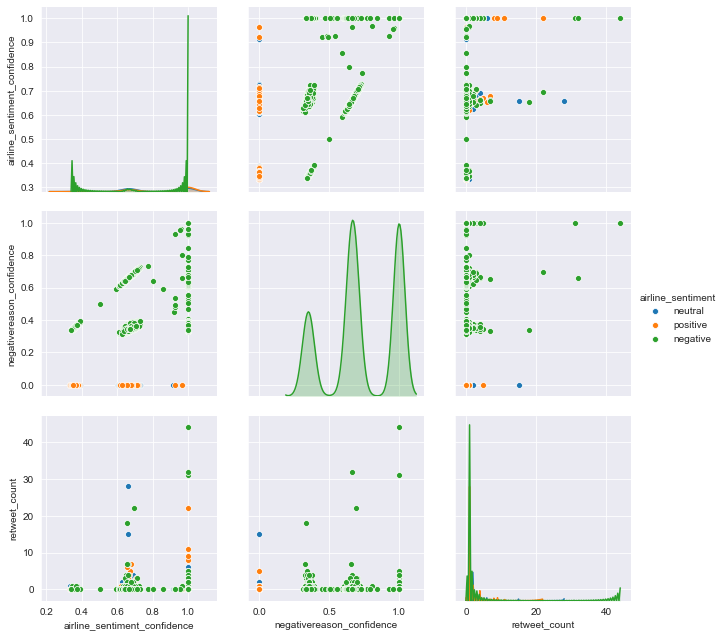

In [11]:
sns.set_style("darkgrid");
sns.pairplot(data, hue="airline_sentiment", size=3);
plt.show()

### Box plot

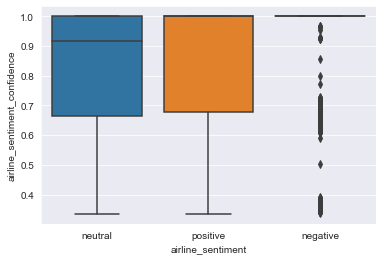

In [12]:
sns.boxplot(x='airline_sentiment',y='airline_sentiment_confidence',data=data)

### Violin plot

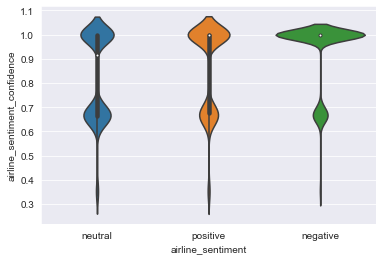

In [13]:
sns.violinplot(x='airline_sentiment',y='airline_sentiment_confidence',data=data)

### FacetGrid

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


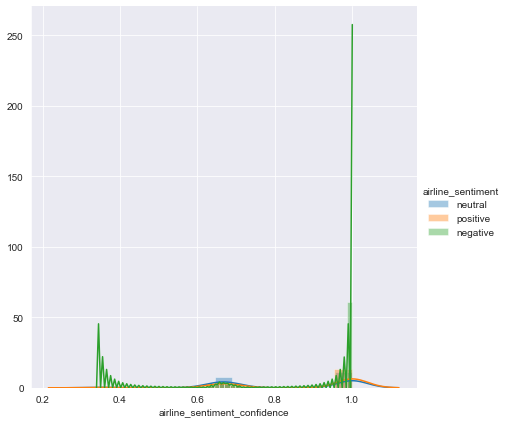

In [14]:
sns.FacetGrid(data,hue='airline_sentiment',size=6).map(sns.distplot,'airline_sentiment_confidence').add_legend()

### Factor or Cat plot

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


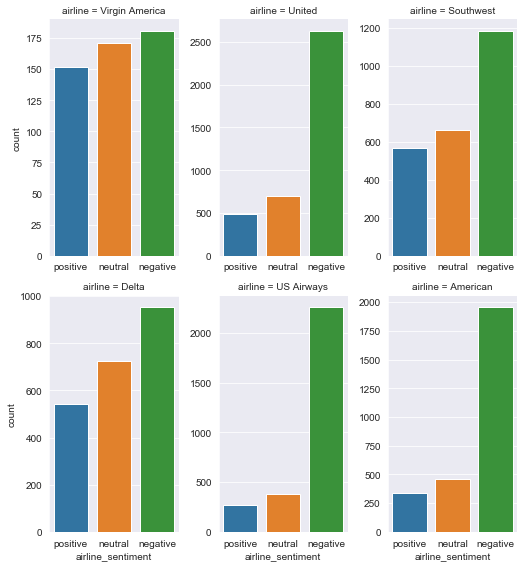

In [15]:
sns.catplot(x = 'airline_sentiment',data=data,
               order = ['positive','neutral','negative'],kind = 'count',col_wrap=3,col='airline',size=4,aspect=0.6,sharex=False,sharey=False)

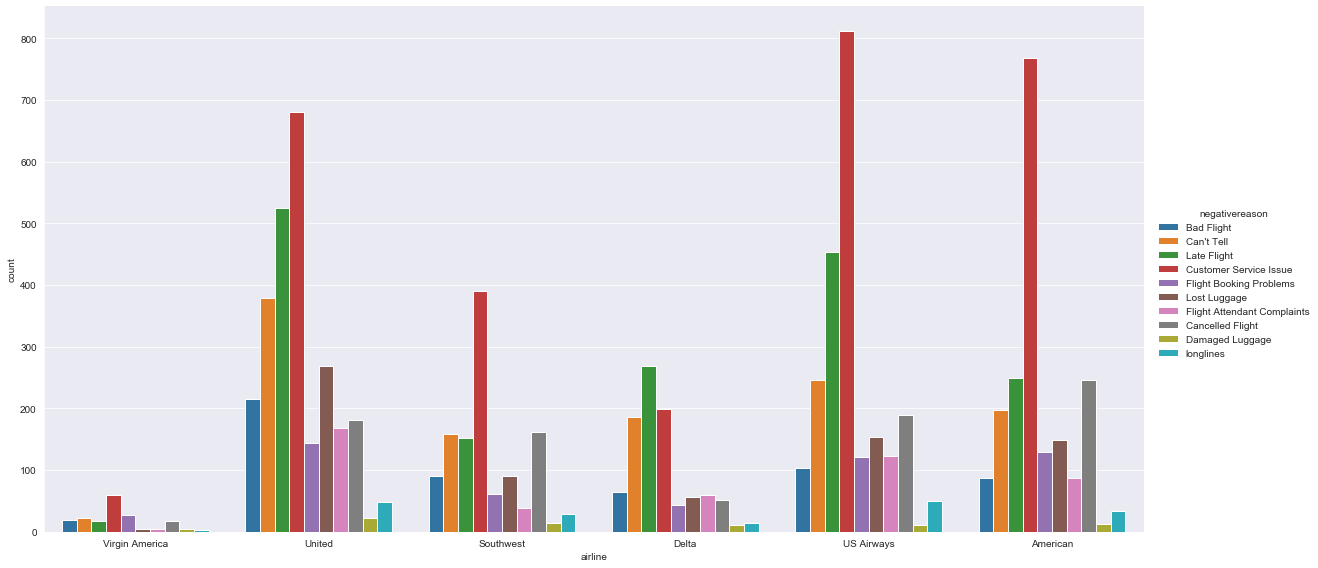

In [16]:
sns.catplot(x = 'airline',data = data,kind = 'count',hue='negativereason',size=8,aspect=2)

### Pie Chart

In [17]:
data.airline_sentiment.value_counts()   #counting the values to plot pie chart

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x2128f999ec8>,
 [Text(-0.46587324595946716, 1.1058761769290402, 'Negative'),
  Text(-0.1297867868913877, -1.1929607663072619, 'Neutral'),
  Text(1.0490022770957574, -0.5827471343970005, 'Positive')],
 [Text(-0.2717593934763558, 0.6450944365419401, '62.69%'),
  Text(-0.07570895901997615, -0.6958937803459028, '21.17%'),
  Text(0.6119179949725252, -0.33993582839825026, '16.14%')])

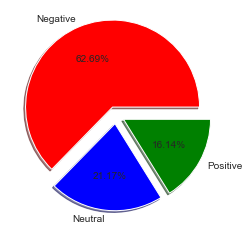

In [18]:
labels=['Negative','Neutral','Positive']
size=[9178,3099,2363]
colors = ["red", "blue", "green"]
explode = (0.1,0.1,0.1)
plt.pie(size,labels=labels,explode=explode,colors=colors,autopct='%1.2f%%',shadow=True)

### Word Cloud

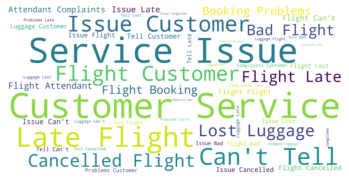

In [19]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
all_words = ' '.join([text for text in data['negativereason'].dropna()])
wordcloud = WordCloud(width = 4000, height = 2000,background_color = 'white',stopwords = ENGLISH_STOP_WORDS).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

(-0.5, 3999.5, 1999.5, -0.5)

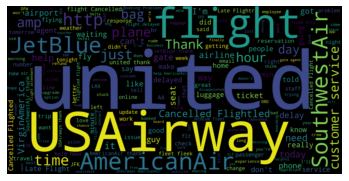

In [20]:
all_words = ' '.join([text for text in data['text']])
wordcloud = WordCloud(width = 4000, height = 2000,background_color = 'black',stopwords = ENGLISH_STOP_WORDS).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')

### Plotting Bivariate Distributions

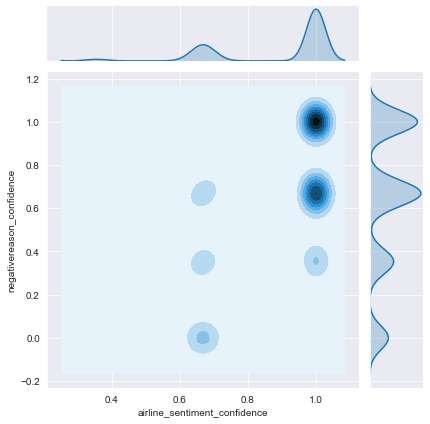

In [21]:


mean, cov = [0, 1], [(1, .5), (.5, 1)]
dataset = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["airline_sentiment_confidence", "negativereason_confidence"])
#kernel Density Estimation

sns.jointplot(x="airline_sentiment_confidence", y="negativereason_confidence", data=df, kind="kde");

In [22]:
import pandas as pd
import numpy as np
import re
import nltk

In [23]:
#importing dataset
dataset= pd.read_csv('Tweets.csv')
dataset

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [24]:
dict = {'negative':-1,                           #replacing the string with values
         'positive':1,
          'neutral':0}
dataset['airline_sentiment'].replace(dict,inplace=True)
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [25]:
#taking care of missing values
dataset.drop(['airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name'],axis=1,inplace=True)
dataset.drop(['tweet_id','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'],axis=1,inplace=True)


In [26]:
for i in range(0,14640):
    if(dataset['text'][i]==[]):
        dataset.drop(i,inplace=True)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [29]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt  

In [30]:
#Tokenisation,Parts of speech,Lexical analysis,Lemmatization
dataset['text'] = np.vectorize(remove_pattern)(dataset['text'], "@[\w]*") #removes word which starts with @...
dataset['text'] = dataset['text'].str.replace("[^a-zA-Z#]", " ") #[^a-zA-Z#]” means anything except alphabets and ‘#’.
dataset['text'] = dataset['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [31]:
ps=PorterStemmer()
data=[] 
for i in range(0,14640):
    review=dataset['text'][i]
    review=re.sub('[^a-zA-Z]',' ',review)
    review=review.lower()
    review=review.split()
    
    #apply stemming concept
    
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))] 
    
    # we use same line as there may be word left which are stopword
    
    review=' '.join(review) 
    data.append(review) 

In [32]:
import pickle 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=800)
x=cv.fit_transform(data).toarray()
with open('CountVectorizer','wb') as file:
    pickle.dump(cv,file)

In [33]:
y = dataset.iloc[:,0].values

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([1, 2, 1, ..., 1, 0, 1], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [36]:
from tensorflow.keras.models import Sequential   #used to initialize the model 
from tensorflow.keras.layers import Dense 

In [37]:
x_train.shape

(11712, 800)

In [38]:
model = Sequential()

In [39]:
model.add(Dense(input_dim=800, kernel_initializer="random_uniform",units=300,activation='sigmoid'))

In [40]:
model.add(Dense(units=100, kernel_initializer="random_uniform", activation='sigmoid'))

In [41]:
model.add(Dense(units=3, kernel_initializer="random_uniform", activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [43]:
model.fit(x_train,y_train, epochs=60, batch_size=10)

Train on 11712 samples
Epoch 1/60
11712/11712 [==============================] - 3s 289us/sample - loss: 0.7399 - accuracy: 0.6906
Epoch 2/60
11712/11712 [==============================] - 3s 238us/sample - loss: 0.5581 - accuracy: 0.7728
Epoch 3/60
11712/11712 [==============================] - 3s 251us/sample - loss: 0.5079 - accuracy: 0.7950
Epoch 4/60
11712/11712 [==============================] - 3s 232us/sample - loss: 0.4926 - accuracy: 0.8006
Epoch 5/60
11712/11712 [==============================] - 3s 265us/sample - loss: 0.4823 - accuracy: 0.8071
Epoch 6/60
11712/11712 [==============================] - 3s 250us/sample - loss: 0.4768 - accuracy: 0.8090
Epoch 7/60
11712/11712 [==============================] - 3s 236us/sample - loss: 0.4747 - accuracy: 0.8108
Epoch 8/60
11712/11712 [==============================] - 3s 241us/sample - loss: 0.4695 - accuracy: 0.8096
Epoch 9/60
11712/11712 [==============================] - 3s 242us/sample - loss: 0.4680 - accuracy: 0.8129
Epoch

In [44]:
y_pred=model.predict(x_test)

In [45]:
y_pred=(y_pred>0.5)
y_pred

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [46]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
model.predict(cv.transform(["@VirginAmerica you suck!"]))   #Negative Sentiment

array([[9.9995637e-01, 4.3674187e-05, 1.2389566e-08]], dtype=float32)

In [65]:
model.predict(cv.transform(["@VirginAmerica Thanks! Good times there and back!"]))    #Positive Sentiment

array([[0.575614  , 0.33625662, 0.08812936]], dtype=float32)

In [66]:
model.predict(cv.transform(["@united how about 3659 YUL-ORD?"]))    #Neutral Sentiment

array([[0.2145339 , 0.63705343, 0.14841269]], dtype=float32)

In [49]:
model.save("airline_predictions.h5")